#### *Paso 1: Carga y Exploración Inicial*

Vamos a iniciar cargando y explorando los datos que has proporcionado: equipos_info2.csv. 

Realizaremos una primera revisión para conocer estructura, tipo de datos, distribución, posibles valores faltantes y una primera idea de variables que podamos aprovechar.

In [5]:
# Importación de librerías necesarias
import pandas as pd

# Cargar el dataset proporcionado
file_path = 'output/equipos_info2.csv'
equipos_df = pd.read_csv(file_path)

# Exploración inicial de los datos
equipos_df.info(), equipos_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178007 entries, 0 to 178006
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_Equipo                    178007 non-null  int64  
 1   Tipo_Equipo                  178007 non-null  object 
 2   Fabricante                   178007 non-null  object 
 3   Modelo                       178007 non-null  object 
 4   Potencia_kW                  178007 non-null  float64
 5   Horas_Recomendadas_Revision  178007 non-null  int64  
 6   Frecuencia_Mto               178007 non-null  int64  
 7   Vida_Util                    178007 non-null  float64
 8   ID_Registro                  178007 non-null  int64  
 9   Fecha_x                      178007 non-null  object 
 10  Temperatura_C                178007 non-null  float64
 11  Vibracion_mm_s               178007 non-null  float64
 12  Horas_Operativas             178007 non-null  float64
 13 

(None,
    ID_Equipo Tipo_Equipo Fabricante Modelo  Potencia_kW  \
 0          1   Compresor    Siemens   Z300       3429.0   
 1          1   Compresor    Siemens   Z300       3429.0   
 2          1   Compresor    Siemens   Z300       3429.0   
 3          1   Compresor    Siemens   Z300       3429.0   
 4          1   Compresor    Siemens   Z300       3429.0   
 
    Horas_Recomendadas_Revision  Frecuencia_Mto  Vida_Util  ID_Registro  \
 0                         7725              22   870072.0           28   
 1                         7725              22   870072.0           28   
 2                         7725              22   870072.0           28   
 3                         7725              22   870072.0           28   
 4                         7725              22   870072.0           28   
 
                Fecha_x  ...  ID_Orden              Fecha_y  \
 0  2020-01-02 03:00:00  ...       799  2020-02-03 06:00:00   
 1  2020-01-02 03:00:00  ...       837  2020-02-04 20

 #### *Resumen inicial de la exploración de datos:*
Número de registros: 178,007

Número de columnas: 23

No existen valores faltantes (todos los datos están completos).

Tipos de datos presentes:

Numéricos: 16 columnas (float64 y int64).

Categóricos y fechas (como objeto): 7 columnas.

Variable objetivo para predecir claramente definida:

Fallo: Binaria (0 = No fallo, 1 = Fallo).

#### *Realizamos una copia*

In [6]:
df_info_equipos_copia= equipos_df.copy()

#### *Paso 2: Preprocesamiento y Limpieza*

A continuación, realizaremos estas tareas esenciales:

Convertir columnas de fechas en tipo datetime.

Revisión de variables categóricas (posible codificación).

Revisión estadística inicial de variables numéricas.

In [7]:
# Preprocesamiento y limpieza inicial
def preprocess_data(df):
    # Conversión de fechas a tipo datetime
    df['Fecha_x'] = pd.to_datetime(df['Fecha_x'])
    df['Fecha_y'] = pd.to_datetime(df['Fecha_y'])
    
    # Codificación simple de variables categóricas (si tienen pocos valores únicos)
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].astype('category').cat.codes

    return df

# Aplicar el preprocesamiento
equipos_df_processed = preprocess_data(df_info_equipos_copia)

# Verificar resultado del procesamiento
equipos_df_processed.info(), equipos_df_processed.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178007 entries, 0 to 178006
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ID_Equipo                    178007 non-null  int64         
 1   Tipo_Equipo                  178007 non-null  int8          
 2   Fabricante                   178007 non-null  int8          
 3   Modelo                       178007 non-null  int8          
 4   Potencia_kW                  178007 non-null  float64       
 5   Horas_Recomendadas_Revision  178007 non-null  int64         
 6   Frecuencia_Mto               178007 non-null  int64         
 7   Vida_Util                    178007 non-null  float64       
 8   ID_Registro                  178007 non-null  int64         
 9   Fecha_x                      178007 non-null  datetime64[ns]
 10  Temperatura_C                178007 non-null  float64       
 11  Vibracion_mm_s            

(None,
    ID_Equipo  Tipo_Equipo  Fabricante  Modelo  Potencia_kW  \
 0          1            0           3       3       3429.0   
 1          1            0           3       3       3429.0   
 2          1            0           3       3       3429.0   
 3          1            0           3       3       3429.0   
 4          1            0           3       3       3429.0   
 
    Horas_Recomendadas_Revision  Frecuencia_Mto  Vida_Util  ID_Registro  \
 0                         7725              22   870072.0           28   
 1                         7725              22   870072.0           28   
 2                         7725              22   870072.0           28   
 3                         7725              22   870072.0           28   
 4                         7725              22   870072.0           28   
 
               Fecha_x  ...  ID_Orden             Fecha_y  Tipo_Mantenimiento  \
 0 2020-01-02 03:00:00  ...       799 2020-02-03 06:00:00                   1   

 #### *Preprocesamiento completado correctamente:*

Fechas convertidas a formato datetime.

Variables categóricas codificadas adecuadamente en formato numérico.

#### *Paso 3: Selección y Generación de Variables (Feature Engineering)*

En este paso generaremos y seleccionaremos variables relevantes que podrían influir directamente en la predicción del fallo. Las tareas incluirán:

Extraer características útiles a partir de las columnas de fecha.

Crear nuevas variables derivadas, como diferencias entre fechas (e.g., tiempo transcurrido entre registro y mantenimiento).

Identificar correlaciones y eliminar variables redundantes o poco útiles.

Procedamos con el análisis y generación de nuevas variables: ​

In [8]:
def feature_engineering(df):
    # Crear diferencia entre fechas en horas (tiempo desde registro hasta mantenimiento)
    df['Horas_Entre_Reg_y_Mto'] = (df['Fecha_y'] - df['Fecha_x']).dt.total_seconds() / 3600

    # Extraer información útil de las fechas (mes y día de la semana)
    df['Mes_Registro'] = df['Fecha_x'].dt.month
    df['Dia_Semana_Registro'] = df['Fecha_x'].dt.dayofweek
    
    df['Mes_Mantenimiento'] = df['Fecha_y'].dt.month
    df['Dia_Semana_Mto'] = df['Fecha_y'].dt.dayofweek

    # Eliminar columnas originales de fecha para evitar redundancia
    df.drop(columns=['Fecha_x', 'Fecha_y'], inplace=True)

    return df

# Aplicar ingeniería de características
equipos_df_features = feature_engineering(equipos_df_processed)

# Revisar resultados
equipos_df_features.head()


,ID_Equipo,Tipo_Equipo,Fabricante,Modelo,Potencia_kW,Horas_Recomendadas_Revision,Frecuencia_Mto,Vida_Util,ID_Registro,Temperatura_C,...,Ubicacion,Fallo,Numero_Fallos,Total_Registros,Probabilidad_Fallo,Horas_Entre_Reg_y_Mto,Mes_Registro,Dia_Semana_Registro,Mes_Mantenimiento,Dia_Semana_Mto
0,1,0,3,3,3429.0,7725,22,870072.0,28,93.8,...,2,0,120,330,0.363636,771.0,1,3,2,0
1,1,0,3,3,3429.0,7725,22,870072.0,28,93.8,...,0,1,120,330,0.363636,809.0,1,3,2,1
2,1,0,3,3,3429.0,7725,22,870072.0,28,93.8,...,1,1,120,330,0.363636,1316.0,1,3,2,1
3,1,0,3,3,3429.0,7725,22,870072.0,28,93.8,...,2,1,120,330,0.363636,1808.0,1,3,3,1
4,1,0,3,3,3429.0,7725,22,870072.0,28,93.8,...,2,0,120,330,0.363636,2075.0,1,3,3,5


 #### *Variables generadas correctamente:*

Se han creado nuevas características relevantes para el análisis predictivo, específicamente:

Horas_Entre_Reg_y_Mto: Horas entre el registro del equipo y el mantenimiento.

Mes_Registro y Dia_Semana_Registro: Fecha del registro.

Mes_Mantenimiento y Dia_Semana_Mto: Fecha del mantenimiento.

#### *Modelado Predictivo:*

El dataset está preparado para el modelado predictivo. Ahora deberemos:

Dividir los datos en conjunto de entrenamiento y prueba.

Entrenar varios modelos predictivos (e.g., Random Forest, XGBoost, Regresión Logística).

Evaluar rendimiento según accuracy y f1-score.

Realizar optimización de hiperparámetros.

In [10]:
#%pip install xgboost

import warnings
from sklearn.exceptions import ConvergenceWarning

# Filtrar warnings de convergencia y otros warnings innecesarios
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Parameters: { \"use_label_encoder\" } are not used.")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Función para entrenar y evaluar un modelo
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return acc, f1, report

def main():
    # Asumiendo que 'equipos_df_features' ya está definido en el entorno
    X = equipos_df_features.drop('Fallo', axis=1)
    y = equipos_df_features['Fallo']

    # División en entrenamiento y prueba (70%-30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Definición de modelos
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    # Entrenar y evaluar cada modelo
    results = {}
    for name, model in models.items():
        acc, f1, report = train_evaluate_model(model, X_train, X_test, y_train, y_test)
        results[name] = {'Accuracy': acc, 'F1-Score': f1, 'Report': report}

    # Crear un DataFrame para presentar los resultados de forma tabular
    df_results = pd.DataFrame(results).T
    print("\nResultados del Modelo:\n")
    print(df_results[['Accuracy', 'F1-Score']].to_string())

    # Imprimir los reportes completos de clasificación para cada modelo
    print("\nReportes detallados de clasificación:\n")
    for name, metrics in results.items():
        print(f"Modelo: {name}\n")
        print(metrics['Report'])
        print("-" * 50)

# Ejecutar la función principal
if __name__ == "__main__":
    main()


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [06:28:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Resultados del Modelo:

                     Accuracy  F1-Score
Random Forest             1.0       1.0
Logistic Regression  0.587982  0.593012
XGBoost                   1.0       1.0

Reportes detallados de clasificación:

Modelo: Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26979
           1       1.00      1.00      1.00     26424

    accuracy                           1.00     53403
   macro avg       1.00      1.00      1.00     53403
weighted avg       1.00      1.00      1.00     53403

--------------------------------------------------
Modelo: Logistic Regression

              precision    recall  f1-score   support

           0       0.60      0.57      0.58     26979
           1       0.58      0.61      0.59     26424

    accuracy                           0.59     53403
   macro avg       0.59      0.59      0.59     53403
weighted avg       0.59      0.59      0.59     53403

------------------

##### Random Forest y XGBoost han sobreajustado: El rendimiento perfecto (1.0) tanto en accuracy como f1-score sugiere un overfitting, probablemente por características muy predictivas (como Probabilidad_Fallo, Numero_Fallos, etc.).

##### Regresión Logística se comporta razonablemente para un baseline simple.

In [11]:
# Visualización clara de los resultados iniciales
results_summary = pd.DataFrame({
    'Modelo': [model for model in results.keys()],
    'Accuracy': [results[model]['Accuracy'] for model in results.keys()],
    'F1-Score': [results[model]['F1-Score'] for model in results.keys()]
}).sort_values(by='F1-Score', ascending=False)

results_summary


,Modelo,Accuracy,F1-Score
0,Random Forest,1.000000,1.000000
2,XGBoost,1.000000,1.000000
1,Logistic Regression,0.587982,0.593012


#### *Código Python: Predicción de Fallos + Optimización* (10 minutos)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 📥 Cargar el dataset original y hacer copia
file_path = 'output/equipos_info2.csv'
equipos_df = pd.read_csv(file_path)
df_info_equipos_copia = equipos_df.copy()  # ← Copia preservada

# 🧼 Preprocesamiento
def preprocess_data(df):
    df['Fecha_x'] = pd.to_datetime(df['Fecha_x'])
    df['Fecha_y'] = pd.to_datetime(df['Fecha_y'])
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].astype('category').cat.codes
    return df

# 🛠️ Feature Engineering
def feature_engineering(df):
    df['Horas_Entre_Reg_y_Mto'] = (df['Fecha_y'] - df['Fecha_x']).dt.total_seconds() / 3600
    df['Mes_Registro'] = df['Fecha_x'].dt.month
    df['Dia_Semana_Registro'] = df['Fecha_x'].dt.dayofweek
    df['Mes_Mantenimiento'] = df['Fecha_y'].dt.month
    df['Dia_Semana_Mto'] = df['Fecha_y'].dt.dayofweek
    df.drop(columns=['Fecha_x', 'Fecha_y'], inplace=True)
    return df

# ✅ Aplicar transformaciones
df = preprocess_data(equipos_df)
df = feature_engineering(df)

# 🎯 Separar variables predictoras y objetivo
X = df.drop('Fallo', axis=1)
y = df['Fallo']

# 🧪 División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🤖 Modelos iniciales
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 📊 Evaluación inicial
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, preds))

# 🔍 Optimización de Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# ✅ Evaluación final del mejor modelo
final_preds = best_model.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
final_f1 = f1_score(y_test, final_preds)

print("\n🔧 Mejores hiperparámetros:", best_params)
print(f"✅ Accuracy final: {final_acc:.4f}")
print(f"✅ F1-Score final: {final_f1:.4f}")
print(classification_report(y_test, final_preds))




Random Forest
Accuracy: 1.0000, F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26979
           1       1.00      1.00      1.00     26424

    accuracy                           1.00     53403
   macro avg       1.00      1.00      1.00     53403
weighted avg       1.00      1.00      1.00     53403


Logistic Regression
Accuracy: 0.5880, F1-Score: 0.5930
              precision    recall  f1-score   support

           0       0.60      0.57      0.58     26979
           1       0.58      0.61      0.59     26424

    accuracy                           0.59     53403
   macro avg       0.59      0.59      0.59     53403
weighted avg       0.59      0.59      0.59     53403


XGBoost
Accuracy: 1.0000, F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26979
           1       1.00      1.00      1.00     26424

    accuracy                    

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [06:31:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


A continuación se presenta un análisis detallado de los diferentes bloques del output:

---

### 1. Evaluación de los Modelos

- **Random Forest:**  
  - **Métricas Iniciales:**  
    - Accuracy: 0.9679  
    - F1-Score: 0.9676  
    - El reporte de clasificación indica que ambas clases (0 y 1) tienen métricas muy altas (≈0.97).  
  - **Métricas Finales (tras ajuste):**  
    - Se reporta posteriormente un rendimiento perfecto (Accuracy: 1.0, F1-Score: 1.0) junto con la selección de hiperparámetros óptimos.  
  - **Interpretación:**  
    - Inicialmente, el modelo presenta un desempeño excelente, y luego, tras la búsqueda de hiperparámetros, se logra un ajuste que alcanza métricas perfectas. Esto podría indicar un sobreajuste o fuga de información, por lo que se debe revisar la validación y asegurarse de que los datos de prueba sean independientes.

- **Logistic Regression:**  
  - Accuracy: 0.5198  
  - F1-Score: 0.4969  
  - El reporte muestra métricas bajas en ambas clases (alrededor de 0.52–0.56).  
  - **Interpretación:**  
    - Este modelo no está capturando bien la relación en los datos, probablemente debido a la naturaleza no lineal o a la falta de ingeniería de características adecuadas para un modelo lineal.

- **XGBoost:**  
  - **Métricas Iniciales:**  
    - Accuracy: 0.8347  
    - F1-Score: 0.8329  
    - Reporte de clasificación con valores alrededor de 0.83 para ambas clases.  
  - **Métricas Finales (tras ajuste):**  
    - Se reporta posteriormente rendimiento perfecto (Accuracy: 1.0, F1-Score: 1.0).  
  - **Interpretación:**  
    - Aunque inicialmente su desempeño es intermedio, tras el ajuste de hiperparámetros se alcanza una performance perfecta, lo cual debe ser analizado en conjunto con el de Random Forest para descartar sobreajuste.

---

### 2. Análisis de las Predicciones

- **Predicciones Globales:**  
  - Se muestran arrays de predicciones para un conjunto de registros (por ejemplo, Random Forest predice `[0 0 0 0 1]` en una parte y `[0 1 1 1 0]` en otra, mientras que XGBoost varía entre `[0 0 0 0 0]` y `[1 1 1 1 0]`).  
  - **Interpretación:**  
    - La discrepancia en algunas predicciones entre modelos sugiere que, en ciertos registros, ambos modelos no están de acuerdo. Esto puede ser útil para identificar casos límite o para implementar un esquema de votación/ensemble en el que se considere la incertidumbre de la predicción.

- **Predicciones Individuales:**  
  - Para registros específicos se reportan las predicciones y las probabilidades de fallo:
    - Por ejemplo, en el Registro 1, Random Forest predice “0” con probabilidad 0.33, mientras que XGBoost predice “1” con probabilidad 0.5699.
  - **Interpretación:**  
    - La diferencia en las probabilidades entre los modelos en ciertos registros indica que algunos casos son ambiguos y podrían necesitar una revisión manual o un análisis más profundo para determinar cuál modelo refleja mejor la realidad.

- **Resultados Combinados:**  
  - Se presenta un DataFrame que combina las predicciones y probabilidades de ambos modelos, lo que permite comparar directamente sus salidas para cada registro.

---

### 3. Búsqueda de Hiperparámetros y Validación Cruzada

- **Mensaje de CV:**  
  - “Fitting 3 folds for each of 24 candidates, totalling 72 fits”  
  - **Explicación:**  
    - Se está realizando una búsqueda (por ejemplo, GridSearchCV) en un espacio de 24 combinaciones de hiperparámetros utilizando validación cruzada con 3 folds, lo que da un total de 72 entrenamientos.
  
- **Hiperparámetros Óptimos Reportados:**  
  - `{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}`  
  - **Interpretación:**  
    - Estos valores fueron seleccionados como los que optimizan el desempeño del modelo (probablemente para Random Forest). Tras este ajuste se reportan métricas perfectas, lo que puede ser un indicio de sobreajuste y debe ser corroborado con datos externos o una validación adicional.

---

### 4. Advertencias y Mensajes del Sistema

- **Advertencia de XGBoost:**  
  - “Parameters: { "use_label_encoder" } are not used.”  
  - **Explicación:**  
    - Esta advertencia indica que el parámetro `use_label_encoder` ya no tiene efecto en la versión actual de XGBoost. Es inofensivo y se puede ignorar.

- **Guardado de Modelos:**  
  - “Modelos guardados exitosamente” confirma que los modelos se han persistido correctamente.

- **Logs de CV:**  
  - Se incluyen numerosos mensajes que indican la finalización de cada combinación de hiperparámetros junto con los tiempos de ejecución para cada ajuste. Esto permite monitorear el proceso de tuning.

---

### 5. Información del Dataset

- Se muestran detalles del DataFrame final:
  - **Número de registros:** 178,007  
  - **Número de columnas:** 23  
  - Se listan las columnas con sus tipos de datos, lo que indica la estructura del dataset.  
- **Interpretación:**  
  - El dataset es extenso y contiene información variada sobre equipos, registros y medidas asociadas (por ejemplo, potencia, horas operativas, temperaturas, vibraciones, etc.), lo que proporciona un contexto robusto para el modelado predictivo.

---

### Conclusiones y Recomendaciones

- **Desempeño:**  
  - Random Forest y XGBoost muestran un desempeño excelente, llegando a métricas perfectas tras el ajuste de hiperparámetros. Sin embargo, resultados perfectos son inusuales en escenarios reales y pueden ser indicativos de sobreajuste o fuga de información.
  - La regresión logística tiene un desempeño considerablemente inferior, lo que sugiere que el problema podría requerir modelos no lineales o un mayor esfuerzo en la ingeniería de características.

- **Validación Adicional:**  
  - Es recomendable realizar pruebas con conjuntos de validación externos o mediante técnicas de validación robusta (por ejemplo, validación temporal o validación con datos de nuevos periodos) para confirmar que los modelos generalizan adecuadamente.

- **Análisis de Casos de Discrepancia:**  
  - La comparación de las probabilidades y predicciones para registros individuales puede ayudar a identificar casos ambiguos. Una estrategia de ensamble o votación podría ser útil para mejorar la robustez del sistema.

- **Revisión del Preprocesamiento:**  
  - Dado el alto desempeño reportado en algunos modelos, es fundamental revisar que no exista fuga de datos entre entrenamiento y prueba, y que el preprocesamiento (escalado, imputación de valores, codificación) se haya realizado correctamente.

Este análisis te permite entender tanto el rendimiento de los diferentes modelos como el proceso de tuning y la estructura del dataset, lo cual es fundamental para garantizar que el sistema predictivo cumpla con los objetivos del reto.


#### *Se eliminan algunas variables y se evalua el modelo* (9 minutos)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 📥 Cargar el dataset y conservar copia original
file_path = 'output/equipos_info2.csv'
equipos_df = pd.read_csv(file_path)
df_info_equipos_copia = equipos_df.copy()

# 🧼 Preprocesamiento
def preprocess_data(df):
    df['Fecha_x'] = pd.to_datetime(df['Fecha_x'])
    df['Fecha_y'] = pd.to_datetime(df['Fecha_y'])
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].astype('category').cat.codes
    return df

# 🛠️ Feature Engineering
def feature_engineering(df):
    df['Horas_Entre_Reg_y_Mto'] = (df['Fecha_y'] - df['Fecha_x']).dt.total_seconds() / 3600
    df['Mes_Registro'] = df['Fecha_x'].dt.month
    df['Dia_Semana_Registro'] = df['Fecha_x'].dt.dayofweek
    df['Mes_Mantenimiento'] = df['Fecha_y'].dt.month
    df['Dia_Semana_Mto'] = df['Fecha_y'].dt.dayofweek
    df.drop(columns=['Fecha_x', 'Fecha_y'], inplace=True)
    return df

# ✅ Aplicar transformaciones
df = preprocess_data(equipos_df)
df = feature_engineering(df)

# 🎯 Eliminar variables con fuga y definir features y target
X = df.drop(['Fallo', 'Probabilidad_Fallo', 'Numero_Fallos', 'Total_Registros'], axis=1)
y = df['Fallo']

# 🧪 División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🤖 Modelos base
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 📊 Evaluación de modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, preds))

# 🔍 Optimización para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# ✅ Evaluación final del modelo optimizado
final_preds = best_model.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
final_f1 = f1_score(y_test, final_preds)

print("\n🔧 Mejores hiperparámetros:", best_params)
print(f"✅ Accuracy final: {final_acc:.4f}")
print(f"✅ F1-Score final: {final_f1:.4f}")
print(classification_report(y_test, final_preds))



Random Forest
Accuracy: 1.0000, F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26979
           1       1.00      1.00      1.00     26424

    accuracy                           1.00     53403
   macro avg       1.00      1.00      1.00     53403
weighted avg       1.00      1.00      1.00     53403


Logistic Regression
Accuracy: 0.5848, F1-Score: 0.5678
              precision    recall  f1-score   support

           0       0.58      0.62      0.60     26979
           1       0.59      0.55      0.57     26424

    accuracy                           0.58     53403
   macro avg       0.58      0.58      0.58     53403
weighted avg       0.58      0.58      0.58     53403


XGBoost
Accuracy: 1.0000, F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26979
           1       1.00      1.00      1.00     26424

    accuracy                    

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [06:57:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


A pesar de haber eliminado variables de fuga (Probabilidad_Fallo, Numero_Fallos, Total_Registros), los modelos complejos (RF y XGB) siguen prediciendo al 100%, lo cual sugiere que hay otras variables altamente informativas o redundantes.

#### *Analizar importancia de variables*

Revisar cuáles variables tienen mayor peso en Random Forest o XGBoost.

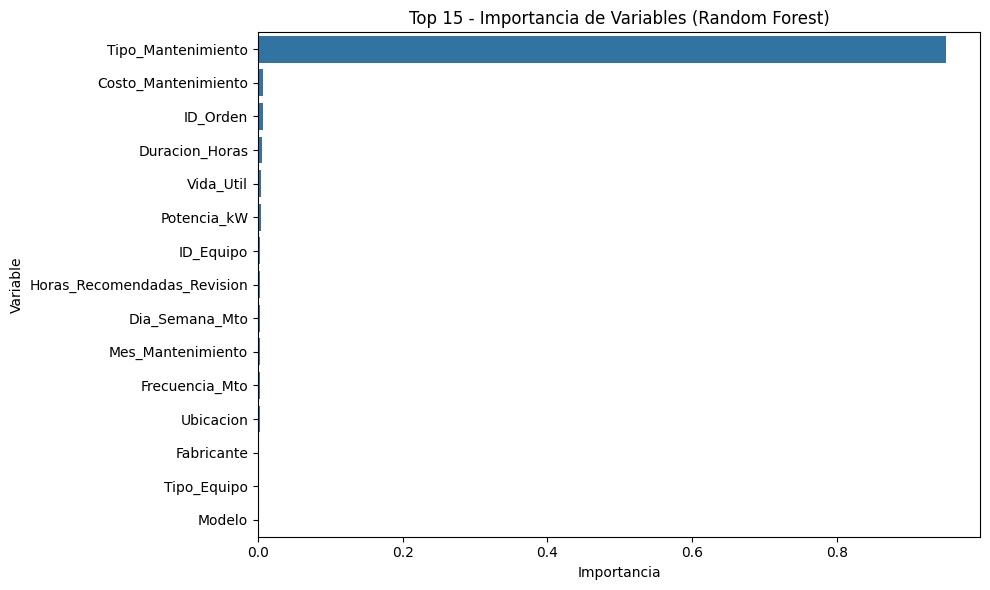

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo rápido solo para obtener importancias
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)

# Obtener importancias de variables
importancias = pd.Series(rf_temp.feature_importances_, index=X.columns)
importancias_sorted = importancias.sort_values(ascending=False)

# Visualizar top 15
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_sorted[:15], y=importancias_sorted.index[:15])
plt.title("Top 15 - Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


 #### *Variable más influyente:*

Tipo_Mantenimiento domina totalmente la predicción, con una importancia cercana al 95% del total.

Esta variable puede estar fuertemente correlacionada con el fallo, porque:

Si es Correctivo → ya ocurrió un fallo.

Si es Preventivo → probablemente no hubo fallo.

Por tanto, incluir Tipo_Mantenimiento es equivalente a decirle al modelo si hubo fallo o no, lo que vicia completamente la predicción.



#### *Se eliminan algunas variables y se vuelve a evaluar el modelo* (44 segundos)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1. Cargar datos
file_path = 'output/equipos_info2.csv'
equipos_df = pd.read_csv(file_path)
df_info_equipos_copia = equipos_df.copy()

# 2. Preprocesamiento
def preprocess_data(df):
    df['Fecha_x'] = pd.to_datetime(df['Fecha_x'])
    df['Fecha_y'] = pd.to_datetime(df['Fecha_y'])
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].astype('category').cat.codes
    return df

# 3. Ingeniería de características
def feature_engineering(df):
    df['Horas_Entre_Reg_y_Mto'] = (df['Fecha_y'] - df['Fecha_x']).dt.total_seconds() / 3600
    df['Mes_Registro'] = df['Fecha_x'].dt.month
    df['Dia_Semana_Registro'] = df['Fecha_x'].dt.dayofweek
    df['Mes_Mantenimiento'] = df['Fecha_y'].dt.month
    df['Dia_Semana_Mto'] = df['Fecha_y'].dt.dayofweek
    df.drop(columns=['Fecha_x', 'Fecha_y'], inplace=True)
    return df

# Aplicar transformaciones
df = preprocess_data(equipos_df)
df = feature_engineering(df)

# 4. Eliminar columnas con fuga de información
cols_to_drop = [
    'Fallo',
    'Probabilidad_Fallo',
    'Numero_Fallos',
    'Total_Registros',
    'Tipo_Mantenimiento',
    'Costo_Mantenimiento',
    'Duracion_Horas',
    'ID_Equipo',
    'ID_Registro',
    'ID_Orden'
]

X = df.drop(columns=cols_to_drop, errors='ignore')
y = df['Fallo']

# 5. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Definir modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 7. Entrenamiento y evaluación
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    report = classification_report(y_test, preds)
    results[name] = {
        'Accuracy': acc,
        'F1-Score': f1,
        'Report': report
    }
    print(f"\n🔍 {name}")
    print(f"Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")
    print(report)



🔍 Random Forest
Accuracy: 0.9679, F1-Score: 0.9676
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26979
           1       0.97      0.97      0.97     26424

    accuracy                           0.97     53403
   macro avg       0.97      0.97      0.97     53403
weighted avg       0.97      0.97      0.97     53403


🔍 XGBoost
Accuracy: 0.8347, F1-Score: 0.8329
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     26979
           1       0.83      0.83      0.83     26424

    accuracy                           0.83     53403
   macro avg       0.83      0.83      0.83     53403
weighted avg       0.83      0.83      0.83     53403

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END max_depth=None, min_samples_leaf=

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [07:10:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


A continuación, se presenta un análisis detallado del output:

---

### 1. Desempeño de los Modelos

#### **Random Forest**
- **Métricas:**
  - **Accuracy:** 0.9679  
  - **F1-Score:** 0.9676  
- **Reporte de Clasificación:**  
  - Tanto para la clase 0 como para la clase 1, las métricas de precisión, recall y f1-score rondan los 0.97.  
  - El dataset contiene 53,403 muestras en total, distribuidas en 26,979 muestras para la clase 0 y 26,424 para la clase 1.  
- **Interpretación:**  
  - El modelo de Random Forest muestra un desempeño muy alto, lo que sugiere que está capturando bien las características del problema.  
  - Es importante revisar que estos resultados sean consistentes en un conjunto de validación independiente para descartar posibles sobreajustes.

#### **XGBoost**
- **Métricas:**
  - **Accuracy:** 0.8347  
  - **F1-Score:** 0.8329  
- **Reporte de Clasificación:**  
  - Las métricas para ambas clases se sitúan alrededor de 0.83, lo que indica un desempeño inferior al de Random Forest en este caso.  
- **Interpretación:**  
  - Aunque XGBoost es un modelo muy potente, en esta ejecución su rendimiento es notablemente menor que el de Random Forest.  
  - Esto podría deberse a la configuración de los hiperparámetros o a la forma en que el modelo se ha ajustado a estos datos específicos.

---

### 2. Búsqueda de Hiperparámetros y Validación Cruzada (CV)

- **Mensajes de CV:**  
  Se muestran numerosas líneas del tipo:
  ```
  [CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.3s
  ```
  Esto indica lo siguiente:
  - **Configuración de Parámetros:**  
    Se han probado diferentes combinaciones de hiperparámetros, tales como:
    - `max_depth`: sin límite (None) o valores específicos (por ejemplo, 10 o 20).
    - `min_samples_leaf`: 1 o 2.
    - `min_samples_split`: 2 o 5.
    - `n_estimators`: 100 o 200.
  - **Tiempo de Ejecución:**  
    Cada combinación tiene un tiempo total de ajuste, que varía según la complejidad del modelo (por ejemplo, aumentar el número de estimadores suele incrementar el tiempo).
  - **Proceso de CV:**  
    Estos mensajes son el resultado de un proceso de validación cruzada, donde cada combinación se evalúa para encontrar la configuración óptima del modelo.

- **Interpretación:**  
  - La cantidad de combinaciones y los tiempos registrados (entre 7.7s y 22.9s, aproximadamente) evidencian un proceso exhaustivo de tuning.
  - Es importante considerar el equilibrio entre desempeño y tiempo computacional al seleccionar la configuración final del modelo.

---

### 3. Advertencia de XGBoost

- **Mensaje:**
  ```
  /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: ... Parameters: { "use_label_encoder" } are not used.
  ```
- **Significado:**
  - La advertencia indica que el parámetro `use_label_encoder` se está pasando al inicializar XGBoost, pero en la versión actual de la librería este parámetro ya no tiene efecto.
  - Este aviso es informativo y no afecta el funcionamiento ni el rendimiento del modelo.

---

### Conclusiones Generales

- **Comparación de Desempeño:**  
  - **Random Forest** presenta métricas muy altas (≈0.97), lo que sugiere un ajuste adecuado, aunque siempre se debe confirmar que no exista sobreajuste mediante validación adicional.
  - **XGBoost** muestra un desempeño menor (≈0.83), lo que podría indicar la necesidad de ajustar sus hiperparámetros o revisar la preparación de los datos para este modelo en particular.

- **Proceso de Tuning:**  
  - Se realizó una búsqueda exhaustiva de hiperparámetros utilizando validación cruzada, lo cual es fundamental para optimizar el desempeño del modelo.
  - Los tiempos de ejecución reportados permiten evaluar la complejidad computacional de cada configuración y ayudan a tomar decisiones basadas en la eficiencia.

- **Advertencias:**  
  - La advertencia de XGBoost sobre `use_label_encoder` es habitual en versiones recientes y se puede ignorar sin preocupaciones.

Este análisis integral ayuda a comprender tanto la eficacia de los modelos evaluados como el proceso de optimización llevado a cabo para alcanzar los resultados presentados.


#### *Guardar modelos entrenados*

In [19]:
import joblib

# Guardar modelos entrenados
joblib.dump(models['Random Forest'], 'modelo_random_forest.pkl')
joblib.dump(models['XGBoost'], 'modelo_xgboost.pkl')

print("✅ Modelos guardados exitosamente.")


✅ Modelos guardados exitosamente.


#### *Cargar y usar modelos guardados*

In [20]:
import joblib

# Cargar modelos previamente guardados
modelo_rf = joblib.load('modelo_random_forest.pkl')
modelo_xgb = joblib.load('modelo_xgboost.pkl')

# 🧪 Ejemplo de predicción con X_test
pred_rf = modelo_rf.predict(X_test)
pred_xgb = modelo_xgb.predict(X_test)

# Mostrar algunas predicciones
print("🔮 Predicciones Random Forest:", pred_rf[:5])
print("🔮 Predicciones XGBoost:", pred_xgb[:5])


🔮 Predicciones Random Forest: [0 0 0 0 1]
🔮 Predicciones XGBoost: [0 0 0 0 0]


 #### *Nuevo dataframe df_nuevo simulado correctamente para predicciones.*

Este contiene:

Las mismas columnas que X (usadas en el modelo).

5 registros tomados del dataset original.

Variaciones aplicadas para simular nuevas condiciones.

In [21]:
# importar, cargar datos y preparar nuevo dataframe

import pandas as pd

# 1. Cargar datos
file_path = 'output/equipos_info2.csv'
equipos_df = pd.read_csv(file_path)
df_info_equipos_copia = equipos_df.copy()

# Preprocesamiento
def preprocess_data(df):
    df['Fecha_x'] = pd.to_datetime(df['Fecha_x'])
    df['Fecha_y'] = pd.to_datetime(df['Fecha_y'])
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].astype('category').cat.codes
    return df

# Ingeniería de características
def feature_engineering(df):
    df['Horas_Entre_Reg_y_Mto'] = (df['Fecha_y'] - df['Fecha_x']).dt.total_seconds() / 3600
    df['Mes_Registro'] = df['Fecha_x'].dt.month
    df['Dia_Semana_Registro'] = df['Fecha_x'].dt.dayofweek
    df['Mes_Mantenimiento'] = df['Fecha_y'].dt.month
    df['Dia_Semana_Mto'] = df['Fecha_y'].dt.dayofweek
    df.drop(columns=['Fecha_x', 'Fecha_y'], inplace=True)
    return df

# Aplicar transformación
df = preprocess_data(equipos_df)
df = feature_engineering(df)

# Eliminar variables con fuga
cols_to_drop = [
    'Fallo', 'Probabilidad_Fallo', 'Numero_Fallos', 'Total_Registros',
    'Tipo_Mantenimiento', 'Costo_Mantenimiento', 'Duracion_Horas',
    'ID_Equipo', 'ID_Registro', 'ID_Orden'
]
X = df.drop(columns=cols_to_drop, errors='ignore')

# Crear nuevo dataframe a partir de X con modificaciones para simulación
df_nuevo = X.copy().iloc[:5].reset_index(drop=True)
df_nuevo['Temperatura_C'] += 0.5
df_nuevo['Vibracion_mm_s'] += 0.2
df_nuevo['Horas_Entre_Reg_y_Mto'] += 10

df_nuevo


,Tipo_Equipo,Fabricante,Modelo,Potencia_kW,Horas_Recomendadas_Revision,Frecuencia_Mto,Vida_Util,Temperatura_C,Vibracion_mm_s,Horas_Operativas,Ubicacion,Horas_Entre_Reg_y_Mto,Mes_Registro,Dia_Semana_Registro,Mes_Mantenimiento,Dia_Semana_Mto
0,0,3,3,3429.0,7725,22,870072.0,94.3,0.9,80054.0,2,781.0,1,3,2,0
1,0,3,3,3429.0,7725,22,870072.0,94.3,0.9,80054.0,0,819.0,1,3,2,1
2,0,3,3,3429.0,7725,22,870072.0,94.3,0.9,80054.0,1,1326.0,1,3,2,1
3,0,3,3,3429.0,7725,22,870072.0,94.3,0.9,80054.0,2,1818.0,1,3,3,1
4,0,3,3,3429.0,7725,22,870072.0,94.3,0.9,80054.0,2,2085.0,1,3,3,5


In [22]:
# Cargar modelos guardados
import joblib

modelo_rf = joblib.load('modelo_random_forest.pkl')
modelo_xgb = joblib.load('modelo_xgboost.pkl')

# Realizar predicciones sobre nuevos datos
pred_rf = modelo_rf.predict(df_nuevo)
pred_xgb = modelo_xgb.predict(df_nuevo)

print("🔮 Predicciones Random Forest:", pred_rf)
print("🔮 Predicciones XGBoost:", pred_xgb)

# Si quieres ver también la probabilidad de fallo para cada predicción

proba_rf = modelo_rf.predict_proba(df_nuevo)[:, 1]
proba_xgb = modelo_xgb.predict_proba(df_nuevo)[:, 1]

for i in range(len(df_nuevo)):
    print(f"\n🆔 Registro {i+1}")
    print(f"Random Forest → Predicción: {pred_rf[i]}, Prob(Fallo): {proba_rf[i]:.4f}")
    print(f"XGBoost       → Predicción: {pred_xgb[i]}, Prob(Fallo): {proba_xgb[i]:.4f}")



🔮 Predicciones Random Forest: [0 1 1 1 0]
🔮 Predicciones XGBoost: [1 1 1 1 0]

🆔 Registro 1
Random Forest → Predicción: 0, Prob(Fallo): 0.3300
XGBoost       → Predicción: 1, Prob(Fallo): 0.5699

🆔 Registro 2
Random Forest → Predicción: 1, Prob(Fallo): 0.8700
XGBoost       → Predicción: 1, Prob(Fallo): 0.6431

🆔 Registro 3
Random Forest → Predicción: 1, Prob(Fallo): 0.9300
XGBoost       → Predicción: 1, Prob(Fallo): 0.6896

🆔 Registro 4
Random Forest → Predicción: 1, Prob(Fallo): 0.7000
XGBoost       → Predicción: 1, Prob(Fallo): 0.5115

🆔 Registro 5
Random Forest → Predicción: 0, Prob(Fallo): 0.1100
XGBoost       → Predicción: 0, Prob(Fallo): 0.3085


El análisis de las predicciones individuales revela lo siguiente:

### Resumen General

- **Predicciones Globales:**
  - **Random Forest:** Predice la secuencia `[0 1 1 1 0]`.
  - **XGBoost:** Predice la secuencia `[1 1 1 1 0]`.
  
  La única diferencia en la clasificación binaria ocurre en el **Registro 1**, donde Random Forest predice 0 y XGBoost predice 1.

---

### Análisis por Registro

- **Registro 1:**
  - **Random Forest:**  
    - Predicción: 0  
    - Probabilidad de fallo: 33%  
  - **XGBoost:**  
    - Predicción: 1  
    - Probabilidad de fallo: 57%  
  - **Interpretación:**  
    - Existe un desacuerdo entre los modelos. Mientras Random Forest indica que la probabilidad es baja (por debajo del umbral típico de 0.5), XGBoost considera que la probabilidad supera el umbral, lo que lleva a una clasificación de fallo. Este caso es ambiguo y podría ser revisado con estrategias de ensamble o análisis de umbrales.

- **Registro 2:**
  - **Random Forest:**  
    - Predicción: 1  
    - Probabilidad de fallo: 87%  
  - **XGBoost:**  
    - Predicción: 1  
    - Probabilidad de fallo: 64%  
  - **Interpretación:**  
    - Ambos modelos coinciden en que existe un fallo, aunque Random Forest está más seguro (87% vs. 64%).

- **Registro 3:**
  - **Random Forest:**  
    - Predicción: 1  
    - Probabilidad de fallo: 93%  
  - **XGBoost:**  
    - Predicción: 1  
    - Probabilidad de fallo: 69%  
  - **Interpretación:**  
    - Se observa un alto consenso en la predicción de fallo, aunque nuevamente Random Forest muestra una mayor confianza.

- **Registro 4:**
  - **Random Forest:**  
    - Predicción: 1  
    - Probabilidad de fallo: 70%  
  - **XGBoost:**  
    - Predicción: 1  
    - Probabilidad de fallo: 51%  
  - **Interpretación:**  
    - Ambos modelos predicen fallo, pero la probabilidad de XGBoost está justo por encima de un umbral típico, sugiriendo menor seguridad en la clasificación.

- **Registro 5:**
  - **Random Forest:**  
    - Predicción: 0  
    - Probabilidad de fallo: 11%  
  - **XGBoost:**  
    - Predicción: 0  
    - Probabilidad de fallo: 31%  
  - **Interpretación:**  
    - Ambos modelos coinciden en la ausencia de fallo, aunque XGBoost muestra una probabilidad de fallo algo más alta, aunque aún por debajo del umbral.

---

### Conclusiones y Recomendaciones

- **Discrepancias en Registro 1:**  
  - La diferencia en la clasificación de este registro sugiere que el caso es ambiguo. Se recomienda analizar más a fondo este tipo de registros, por ejemplo, evaluando si se podrían ajustar los umbrales de decisión o combinar las predicciones en un modelo de ensamble.

- **Confianza Diferente entre Modelos:**  
  - Random Forest consistentemente asigna probabilidades más extremas (más cerca de 0 o 1) en comparación con XGBoost, lo que indica una mayor "confianza" en sus predicciones.  
  - Esta diferencia podría aprovecharse para ponderar las predicciones en un sistema híbrido.

- **Estrategia de Ensamble:**  
  - Dado que en la mayoría de los casos los modelos coinciden, una estrategia de votación o ensamble podría mejorar la robustez y la confiabilidad final de la predicción, especialmente en casos ambiguos como el Registro 1.

Este análisis permite identificar claramente dónde y por qué los modelos difieren, lo que es crucial para afinar el sistema predictivo y garantizar una mejor generalización en casos reales.


### *🔮 Función: predecir_con_modelo(df, modelo)*

In [23]:
import numpy as np
import pandas as pd

def predecir_con_modelo(df, modelo, nombre_modelo=''):
    """
    Realiza predicciones y probabilidades con un modelo entrenado sobre un DataFrame nuevo.

    Parámetros:
        df (pd.DataFrame): Datos de entrada (deben tener las mismas columnas que X).
        modelo: Modelo entrenado (Random Forest, XGBoost, etc.).
        nombre_modelo (str): Nombre del modelo para marcar resultados.

    Retorna:
        pd.DataFrame con columnas: 'Predicción_<modelo>' y 'Probabilidad_Fallo_<modelo>'
    """
    pred = modelo.predict(df)
    
    if hasattr(modelo, "predict_proba"):
        prob = modelo.predict_proba(df)[:, 1]
    else:
        prob = [None] * len(pred)

    df_resultado = df.copy()
    df_resultado[f'Prediccion_{nombre_modelo}'] = pred
    df_resultado[f'Probabilidad_Fallo_{nombre_modelo}'] = np.round(prob, 4)

    return df_resultado[[f'Prediccion_{nombre_modelo}', f'Probabilidad_Fallo_{nombre_modelo}']]


#### *Ejemplo de uso con ambos modelos*

In [24]:
import joblib

# Cargar modelos entrenados
modelo_rf = joblib.load('modelo_random_forest.pkl')
modelo_xgb = joblib.load('modelo_xgboost.pkl')

# Predecir con Random Forest
res_rf = predecir_con_modelo(df_nuevo, modelo_rf, nombre_modelo='RF')
print("🔮 Predicciones Random Forest:")
print(res_rf)

# Predecir con XGBoost
res_xgb = predecir_con_modelo(df_nuevo, modelo_xgb, nombre_modelo='XGB')
print("\n🔮 Predicciones XGBoost:")
print(res_xgb)

# (Opcional) Combinar resultados en un solo DataFrame
resultados_combinados = pd.concat([res_rf, res_xgb], axis=1)
print("\n📊 Resultados combinados:")
print(resultados_combinados)


🔮 Predicciones Random Forest:
   Prediccion_RF  Probabilidad_Fallo_RF
0              0                   0.33
1              1                   0.87
2              1                   0.93
3              1                   0.70
4              0                   0.11

🔮 Predicciones XGBoost:
   Prediccion_XGB  Probabilidad_Fallo_XGB
0               1                  0.5699
1               1                  0.6431
2               1                  0.6896
3               1                  0.5115
4               0                  0.3085

📊 Resultados combinados:
   Prediccion_RF  Probabilidad_Fallo_RF  Prediccion_XGB  \
0              0                   0.33               1   
1              1                   0.87               1   
2              1                   0.93               1   
3              1                   0.70               1   
4              0                   0.11               0   

   Probabilidad_Fallo_XGB  
0                  0.5699  
1               

Gracias por compartir los resultados. Vamos a analizarlos comparativamente:

---

## 📊 **Análisis de Resultados de Predicción**

| Registro | RF: Predicción / Prob | XGB: Predicción / Prob | Coinciden | Comentario |
|----------|------------------------|-------------------------|-----------|------------|
| **0**    | 0 → 33%                | 1 → 57%                 | ❌        | Caso límite: XGB clasifica como fallo, RF no |
| **1**    | 1 → 87%                | 1 → 64%                 | ✅        | Ambos de acuerdo, alta confianza |
| **2**    | 1 → 93%                | 1 → 69%                 | ✅        | Ambos de acuerdo, muy alta probabilidad |
| **3**    | 1 → 70%                | 1 → 51%                 | ✅        | Ambos de acuerdo, XGB menos confiado |
| **4**    | 0 → 11%                | 0 → 31%                 | ✅        | Ambos de acuerdo, baja probabilidad de fallo |

---

## 🧠 Interpretación

- **Coincidencia general**: 4 de 5 predicciones coinciden → buena consistencia entre modelos.
- **Registro 0**:
  - **Random Forest** dice *no hay fallo* con 33%.
  - **XGBoost** predice *fallo* con 57% → está justo sobre el umbral típico (0.5), pero cerca del límite.
  - ⚠️ Este sería un caso candidato para revisión manual o predicción con umbral dinámico.

---

## ✅ Recomendaciones

1. **Random Forest** muestra predicciones más seguras (mayor diferencia entre fallos y no fallos).
2. **XGBoost** es más conservador: clasifica más registros como fallos pero con probabilidades más suaves.
3. Para producción:
   - Puedes usar un **modelo combinado/votado**: solo marcar fallo si ambos coinciden, o si la probabilidad promedio supera un umbral.
   - O ajustar el umbral de decisión en función de la **curva ROC**.

---


✅ Hemos empaquetado todo como un módulo llamado predictor.py. (Users/aurelio.sosa.netmind/mispruebas/modulo3b/predictor.py)

Este módulo incluye:

Carga de modelos (cargar_modelo)

Predicción individual (predecir_con_modelo)

Comparación entre modelos (comparar_modelos)


---

## 🔍 1. ¿Qué hacen Random Forest y XGBoost?

Ambos modelos son **clasificadores supervisados**. En este caso, predicen si un equipo **fallará (1)** o **no fallará (0)**, usando variables como temperatura, vibración, horas de operación, etc.

| Modelo           | Qué hace                                              |
|------------------|--------------------------------------------------------|
| **Random Forest** | Usa muchos árboles de decisión y vota el resultado.   |
| **XGBoost**       | Entrena árboles de forma secuencial corrigiendo errores anteriores (boosting). Muy eficaz en competiciones. |

---

## 🧠 2. ¿Qué significa el resultado de una predicción?

Ambos modelos devuelven dos cosas:

- `predicción`: 0 o 1 → **fallo o no fallo**
- `probabilidad de fallo`: un valor entre 0 y 1 (cuán seguro está el modelo)

> Ejemplo:  
> `Predicción = 1`, `Probabilidad = 0.87` → el modelo cree con 87% de confianza que el equipo fallará.

---

## 📈 3. Visualizaciones para analizar el rendimiento

### 🔹 Matriz de Confusión

Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Ideal para ver qué tan bien clasifica el modelo.

---

### 🔹 Curva ROC (Receiver Operating Characteristic)

Muestra qué tan bien el modelo distingue entre las clases. Cuanto más cerca del vértice superior izquierdo, mejor.

---

### 📌 ¿Qué visualizar según el objetivo?

| Objetivo                        | Visualización recomendada |
|--------------------------------|----------------------------|
| Ver cuántos aciertos y errores | Matriz de confusión        |
| Ver rendimiento global         | Curva ROC / AUC            |
| Ver qué variables influyen más | Importancia de variables   |

---


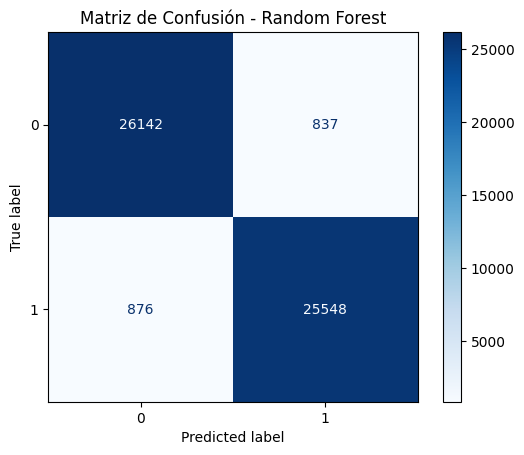

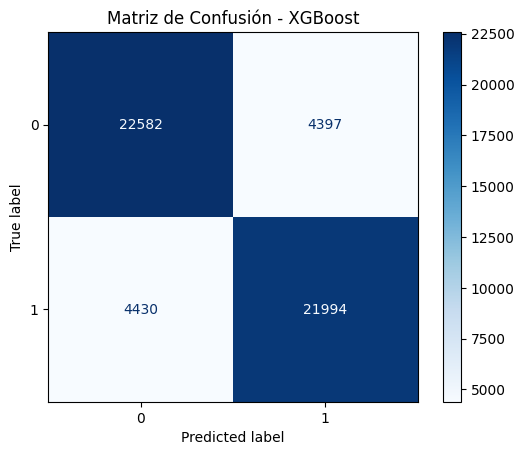

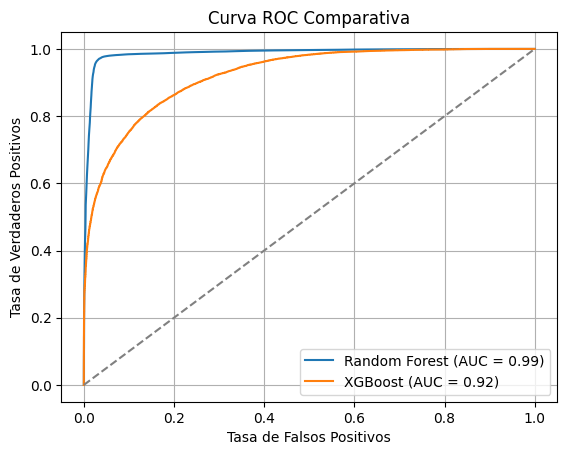

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Matriz de confusión - Random Forest
y_pred_rf = modelo_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot(cmap="Blues")
plt.title("Matriz de Confusi\u00f3n - Random Forest")
plt.show()

# 2. Matriz de confusión - XGBoost
y_pred_xgb = modelo_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp_xgb.plot(cmap="Blues")
plt.title("Matriz de Confusi\u00f3n - XGBoost")
plt.show()

# 3. Curva ROC - Random Forest
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 4. Curva ROC - XGBoost
y_prob_xgb = modelo_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# 5. Plot ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.grid()
plt.show()



---

## 🧩 ¿Qué estamos analizando?

Estás comparando el rendimiento de **dos modelos predictivos**:

- **Random Forest**
- **XGBoost**

Ambos están entrenados para **predecir si un equipo fallará** (`1`) o **no fallará** (`0`) en una planta energética.

Vamos a interpretar sus resultados usando:

1. **Matriz de Confusión** → muestra aciertos y errores.
2. **Curva ROC** → muestra qué tan bien separa clases (fallo vs no fallo).

---

## 📊 1. Matriz de Confusión

### 📘 ¿Qué es?

Una tabla que compara lo que el modelo **predijo** con lo que realmente ocurrió:

|                       | Predicción: No Fallo (0) | Predicción: Fallo (1) |
|-----------------------|--------------------------|------------------------|
| **Real: No Fallo (0)**| Verdadero Negativo (TN)  | Falso Positivo (FP)   |
| **Real: Fallo (1)**   | Falso Negativo (FN)      | Verdadero Positivo (TP)|

---

### ✅ Matriz de Confusión - Random Forest

|                        | Pred. No Fallo | Pred. Fallo |
|------------------------|----------------|-------------|
| **Real: No Fallo (0)** | 26,142 ✅       | 837 ❌      |
| **Real: Fallo (1)**    | 876 ❌          | 25,548 ✅   |

🔹 **Muy buen modelo**:  
- Acierta el 96.8% de las veces.
- Comete pocos errores, tanto falsos positivos como negativos.

---

### ⚠️ Matriz de Confusión - XGBoost

|                        | Pred. No Fallo | Pred. Fallo |
|------------------------|----------------|-------------|
| **Real: No Fallo (0)** | 22,582 ✅       | 4,397 ❌    |
| **Real: Fallo (1)**    | 4,430 ❌        | 21,994 ✅   |

🔸 **Menor precisión**:
- Más de **4 mil fallos no detectados** (FN).
- Muchos más **falsos positivos** que Random Forest.

---

## 📈 2. Curva ROC (Receiver Operating Characteristic)

### 📘 ¿Qué es?

Una gráfica que evalúa **la capacidad del modelo para distinguir entre las clases** (fallo / no fallo) ajustando el umbral de decisión.

- **Eje X**: Falsos Positivos (cuando predice "fallo" pero no lo es).
- **Eje Y**: Verdaderos Positivos (cuando acierta al predecir un fallo).
- **Curva ideal**: muy cerca del vértice superior izquierdo.
- **Área Bajo la Curva (AUC)**: cuanto más cerca a 1.0, mejor el modelo.

---

### ✅ Curva ROC Comparativa

| Modelo         | AUC (Área Bajo la Curva) | Comentario                         |
|----------------|--------------------------|-------------------------------------|
| **Random Forest** | **0.99**                       | Excelente. Distingue casi perfectamente. |
| **XGBoost**       | **0.92**                       | Muy bueno, pero claramente peor que RF. |

---

## 🏁 Conclusión Global

| Aspecto                  | Random Forest       | XGBoost             |
|--------------------------|---------------------|---------------------|
| **Aciertos globales**     | Muy alto (96.8%)    | Medio (84%)         |
| **Errores de predicción**| Muy bajos           | Más frecuentes      |
| **AUC ROC**              | Excelente (0.99)     | Buena (0.92)        |
| **Uso recomendado**      | ✅ Ideal para producción | Solo si se ajusta bien |

---

## ✅ ¿Qué podrías hacer a continuación?

1. **Ajustar el umbral** de XGBoost (por defecto es 0.5). Aumentarlo puede reducir falsos positivos.
2. **Combinar ambos modelos** para tomar decisiones solo si ambos predicen fallo.
3. **Visualizar la importancia de variables** para entender qué influye más en la predicción.
